<a href="https://colab.research.google.com/github/JamilyaSultan/INDE-597-Deep-and-Reinforcement-Learning/blob/main/Chapter_4_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10_000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
# Verify lengths
max([max(seq) for seq in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()

reversed_word_index = dict(

    [(value, key) for (key, value) in word_index.items()]
)

In [ ]:
def decoded_view(data, i):
    view = " ".join([reversed_word_index.get(j-3, "?") for j in data[i]])
    return view

In [ ]:
decoded_view(train_data, 0)

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
# Multi-hot Encode the inout vectors
#input_x = [3, 6, 4]
#new_input_x = [0, 0, 0, 1, 1, 0, 1]

def vectorize_sequence(sequences, dimension=10_000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

#Instantiate the model with layers
model = keras.Sequential([
                          layers.Dense(16, activation = 'relu'),
                          layers.Dense(16, activation = "relu"),
                          layers.Dense(1, activation="sigmoid")
])

#compile the model with optimizer and loss
model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=["accuracy"])


In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 54ms/step - loss: 0.5084 - accuracy: 0.7877 - val_loss: 0.3771 - val_accuracy: 0.8753
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3046 - accuracy: 0.9039 - val_loss: 0.3233 - val_accuracy: 0.8710
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2243 - accuracy: 0.9279 - val_loss: 0.2853 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1760 - accuracy: 0.9440 - val_loss: 0.2984 - val_accuracy: 0.8830
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1448 - accuracy: 0.9542 - val_loss: 0.2861 - val_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1173 - accuracy: 0.9637 - val_loss: 0.2925 - val_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0979 - accuracy: 0.9715 - val_loss: 0.3170 - val_accuracy: 0.8820
Epoch 8/20
30

<function matplotlib.pyplot.show>

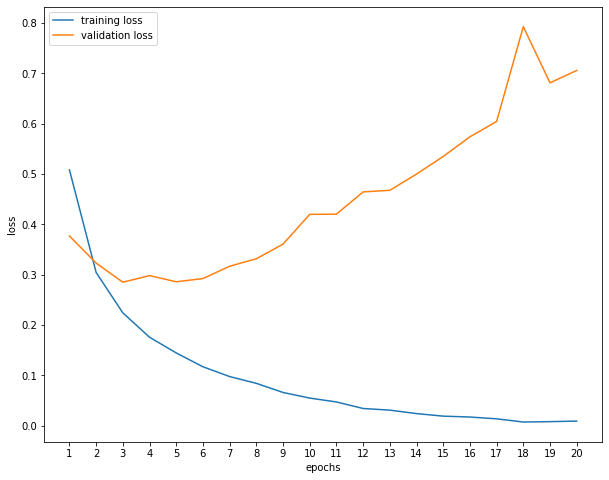

In [ ]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(10,8))
plt.plot(epochs, loss_values, label = "training loss")
plt.plot(epochs, val_loss_values, label = "validation loss")
plt.xticks(epochs)
plt.xlabel("epochs")
plt.ylabel('loss')
plt.legend()
plt.show